In [68]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

from matplotlib import animation, rc
from IPython.display import HTML

In [93]:
## grassmannian
# def Transition(X,Y):
#     '''
#     X,Y: k subspaces of R^n represented by n by k matrices
#     return: a function of time [0,1]
#     '''
#     M = np.dot(Y, np.linalg.inv(np.dot(X.T, Y)))
#     projector = np.eye(X.shape[0]) - np.dot(X, X.T)
#     U,sigma,VT = np.linalg.svd(np.dot(projector, M), False)
#     theta = np.arctan(sigma)
#     V = VT.T
#     def f(t):
#         res = np.dot(np.dot(X, V), np.diag(np.cos(theta * t)))\
#             + np.dot(U, np.diag(np.sin(theta * t)))
#         return res
#     return f

## orthogonal group
def Transition(X,Y):
    '''
    X,Y: n by n orthogonal matrices
    return: a function of time [0,1]
    '''
    M = scipy.linalg.logm(np.dot(X.T, Y))
    def f(t):
        return np.real(np.dot(X, scipy.linalg.expm(t * M)))
    return f

## Transition between two orthonormal matrices

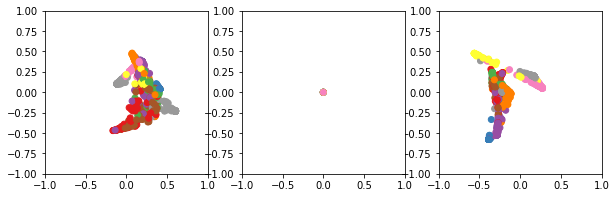

In [78]:
data = np.fromfile('softmax_pca_100_1000_10.bin', dtype='float32').reshape([100,1000,10])
data = data[-1,:,:]
labels = np.fromfile('labels_1000.bin', dtype='uint8')

A,_ = np.linalg.qr(np.random.randn(10,10), 'complete')
B,_ = np.linalg.qr(np.random.randn(10,10), 'complete')
f = Transition(A,B)


# fig, ax = plt.subplots()
# ax.set_xlim((-1,1))
# ax.set_ylim((-1,1))
fig = plt.figure(figsize=[10,3])

plt.subplot(131)
p = np.dot(data, A)
plt.scatter(p[:,0], p[:,1], c=labels, cmap='Set1')
plt.axis('square')
plt.xlim([-1,1])
plt.ylim([-1,1])

plt.subplot(133)
p = np.dot(data, B)
plt.scatter(p[:,0], p[:,1], c=labels, cmap='Set1')
plt.axis('square')
plt.xlim([-1,1])
plt.ylim([-1,1])

ax = fig.add_subplot(132)
ax.axis('square')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])

scatter = ax.scatter([], [])
# initialization function: plot the background of each frame
def init():
    scatter.set_offsets(np.zeros([10,2]))
    scatter.set_array(labels)
    scatter.set_cmap('Set1')
    return (scatter,)

# animation function. This is called sequentially
def animate(i):
    m = f(i/10)
    p = np.dot(data, m[:,:2])
    scatter.set_offsets(p)
    return (scatter,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10, interval=200, blit=False)
# HTML(anim.to_html5_video())
HTML(anim.to_jshtml())



## animating linear maps

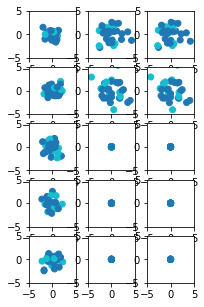

In [165]:
ndim1 = 10
ndim2 = 4
maxdim = max(ndim1, ndim2)
cmap = 'tab10'
# data = np.fromfile('softmax_pca_100_1000_10.bin', dtype='float32').reshape([100,1000,10])
# data = data[-1,:,:ndim1]
# labels = np.fromfile('labels_1000.bin', dtype='uint8')
data = np.random.randn(30,ndim1)
labels = np.random.randint(0,2,30)


# M = np.random.beta(14,5, [ndim1,ndim2])
M0 = np.random.random([ndim1,ndim2])*2-1
M = np.eye(maxdim)*1e-5
M[:ndim1, :ndim2] = M0
U, s, VT = np.linalg.svd(M)

M1 = U
M2 = np.diag(s)
M3 = VT

vlim = 5

f1 = Transition(np.eye(*M1.shape), M1)
f2 = Transition(np.eye(*M2.shape), M2)
f3 = Transition(np.eye(*M3.shape), M3)

nrow = maxdim//2
fig = plt.figure(figsize=[3, nrow])


axes = list(range(nrow))
scatters = []
for i in range(nrow):
    plt.subplot(nrow, 3, i*3+1)
    plt.scatter(data[:,2*i], data[:,2*i+1], c=labels, cmap=cmap)
    plt.axis('square')
    plt.xlim([-vlim,vlim])
    plt.ylim([-vlim,vlim])

    axes[i] = fig.add_subplot(nrow, 3, i*3+2)
    axes[i].axis('square')
    axes[i].set_xlim([-vlim,vlim])
    axes[i].set_ylim([-vlim,vlim])

    plt.subplot(nrow, 3, i*3+3)
    p = np.dot(data, M)
    plt.scatter(p[:,2*i], p[:,2*i+1], c=labels, cmap=cmap)
    plt.axis('square')
    plt.xlim([-vlim,vlim])
    plt.ylim([-vlim,vlim])



    scatters.append(axes[i].scatter([], []))
    
# initialization function: plot the background of each frame
def init():
    for s in scatters:
        s.set_offsets(np.zeros([1,2]))
        s.set_array(labels)
        s.set_cmap(cmap)
    return scatters

# animation function. This is called sequentially
fps = 30
duration = 3
nframe = int(duration * fps)
def animate(i):
    t = i/nframe
    if t<1/3:
        m = f1(t*3)
    elif t<2/3:
        m = np.dot(f1(1), f2(t*3-1))
    else:
        m = np.dot(np.dot(f1(1), f2(1)), f3(t*3-2))
    p = np.dot(data, m)
    [s.set_offsets(p[:, i*2:i*2+2]) for i,s in enumerate(scatters)]
    return scatters

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nframe, interval=1000/fps, blit=True)
# HTML(anim.to_html5_video())
HTML(anim.to_jshtml())


## TODO: trajectory of transition!

In [161]:
s

array([2.25495831, 1.78970685, 1.26191697, 1.17290682, 1.        ,
       1.        , 0.84248877, 0.56780118, 0.40036519, 0.22462521])